_**Group Members:**_

Haoyang Ma

## Part 1: Correlation and Convolution Basics

### Problem 1.1 (Exam Style)

F=[6,1,18,12,-7,13,0,4]

V=[18,12,-7,13]

S=[18,12,-7,13,0,4]

### Problem 1.2 (Exam Style)

F=[4,0,-1,14,-11,15,1,6]

V=[-1,14,-11,15]

S=[-1,14,-11,15,1,6]

### Problem 1.3 (Exam Style)

$X = \left[\begin{array}{rrr}
    25 & 39 & 13 & 2 \\
    19 & 9 & 20 & 3 \\
    9 & 9 & 1 & 3
\end{array}\right]$


## Part 2: Differentiation Basics

### Problem 2.1 (Exam Style)

$I_{c} = \left[\begin{array}{rrr}
    12 & 8 & 8 & -8 \\
    16 & 8 & 8 & -20 \\
    16 & -16 & -16 & -8 \\
    8 & 0 & 0 & -8 
\end{array}\right]$


$I_{r} = \left[\begin{array}{rrr}
    12 & 16 & 20 & 24 \\
    24 & 4 & 0 & -20 \\
    -4 & -8 & -12 & -16 \\
    -24 & -16 & -8 & 0 
\end{array}\right]$


### Problem 2.2 (Exam Style)

The issue with "valid" convolution is that it does not perform zero-padding or boundary extension around the edges of the image or signal. When computing the central differences gradient, it is typically necessary to consider the boundary pixels of the image or signal. By using "valid" convolution, these boundary pixels are ignored, leading to inaccurate gradient estimates at the edges.

### Problem 2.3 (Exam Style)

$I_{c} = \left[\begin{array}{rrr}
    12 & 8 & 8 & 24 \\
    4 & 8 & 8 & 4 \\
    -8 & -16 & -16 & -8 \\
    0 & 0 & 0 & 0 
\end{array}\right]$


$I_{r} = \left[\begin{array}{rrr}
    12 & 4 & 12 & 4 \\
    24 & 4 & 0 & -20 \\
    -4 & -8 & -12 & -16 \\
    -16 & -8 & 0 & 8 
\end{array}\right]$


### Problem 2.4 (Exam Style)

Because the Sobel operator is separable, we have already computed the central difference D earlier. Therefore, we only need to use a smoothing filter S on top of the previous step's result to calculate the final result.

$I_{c}^{'} = \left[\begin{array}{rrr}
    10 & 8 & 8 & 19 \\
    3 & 2 & 2 & 6 \\
    -3 & -6 & -6 & -3 \\
    -2 & -4 & -4 & -2 
\end{array}\right]$


$I_{r}^{'} = \left[\begin{array}{rrr}
    10 & 8 & 8 & 6 \\
    19 & 8 & -4 & -15 \\
    -5 & -8 & -12 & -15 \\
    -14 & -8 & 0 & 6
\end{array}\right]$


## Part 3: Gaussian Differentiation

### Problem 3.1

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(sigma, trunc_multiple=3.5):
    # Calculate the radius of the Gaussian kernel
    h = int(np.ceil(sigma * trunc_multiple))
    
    # Create an array of x values
    x = np.arange(-h, h+1)
    
    # Calculate the Gaussian kernel
    g = np.exp(-x**2 / (2 * sigma**2))
    g /= g.sum()  # Normalize the kernel
    
    return g, x

def d_gaussian(sigma, trunc_multiple=3.5):
    # Calculate the radius of the Gaussian kernel
    h = int(np.ceil(sigma * trunc_multiple))
    
    # Create an array of x values
    x = np.arange(-h, h+1)
    
    # Calculate the derivative of the Gaussian kernel
    d = -x * np.exp(-x**2 / (2 * sigma**2)) / (sigma**2)
    d /= np.abs(d).sum()  # Normalize the kernel
    
    return d, x


In [31]:
def s_func(t,T=50):
    T=50
    res=np.sin((np.pi*t/T)**2)
    return res

def s_true_derivative(t, T):
    return np.sin(2 * np.pi * t / T) * (np.pi / T)

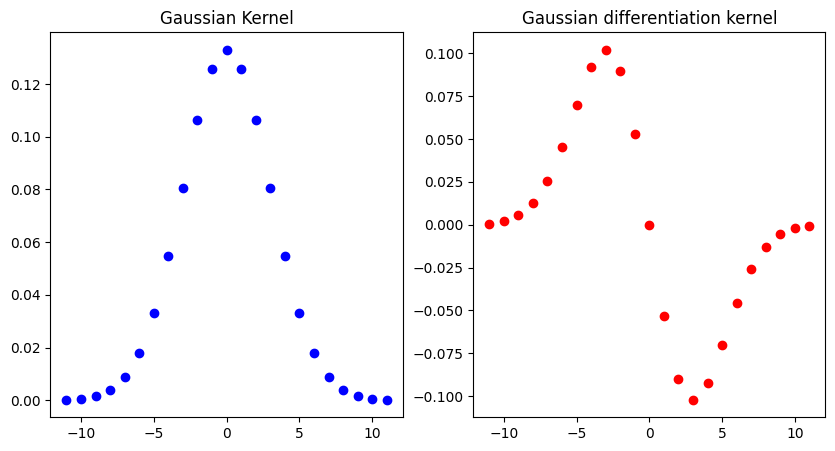

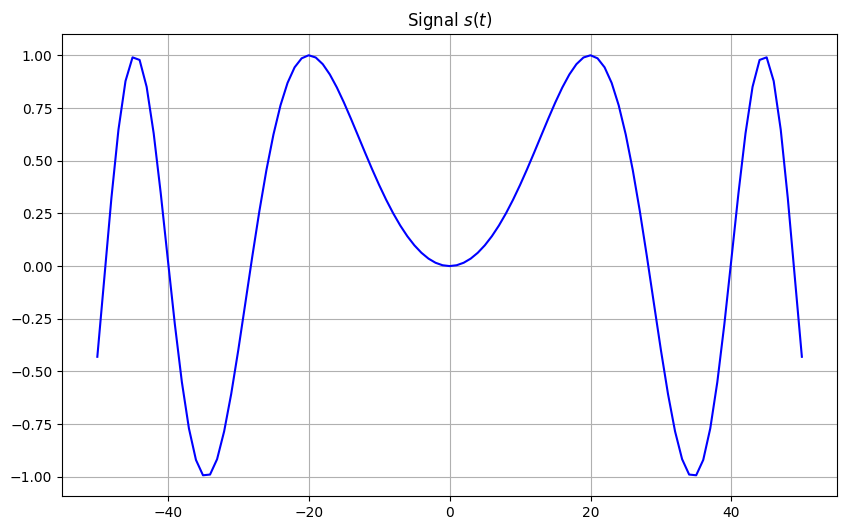

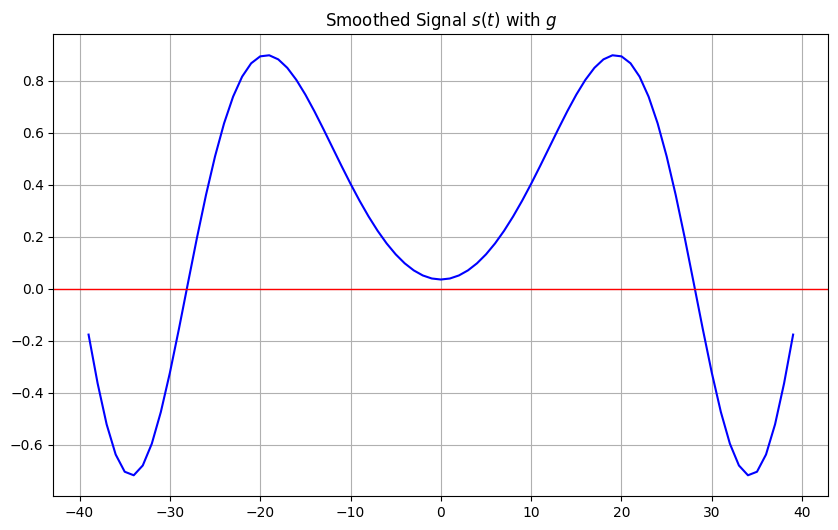

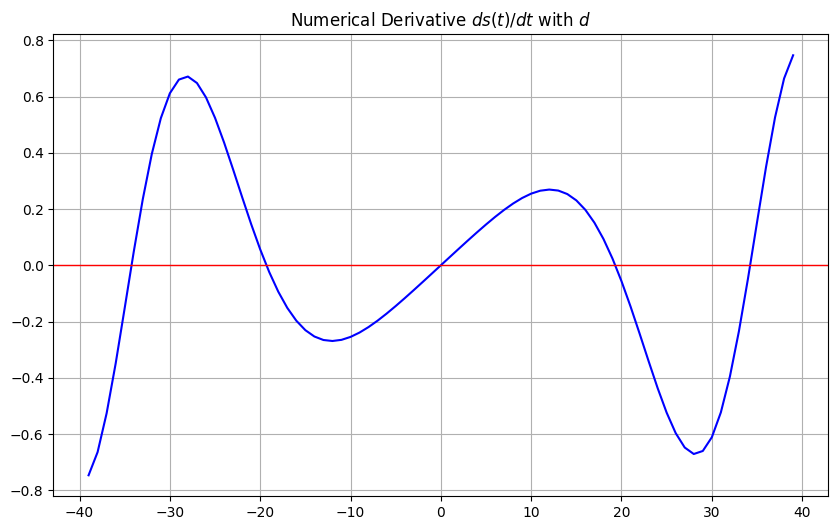

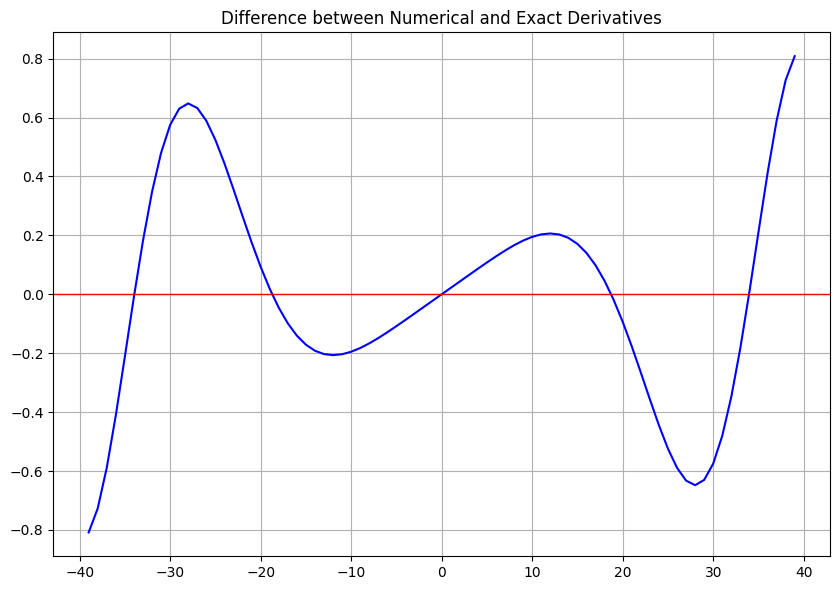

In [32]:
T=50
sigma=3

def plot_signal(title, t, signal, zero_line=True):
    plt.plot(t, signal, 'b-')
    if zero_line:
        plt.axhline(0, color='red', linewidth=1)
    plt.title(title)
    plt.grid(True)

# Generate signals
t = np.arange(-T, T + 1)
s = s_func(t)
t_truncated = np.arange(-39,40)

s_true_d = s_true_derivative(t_truncated, T)

# Generate kernels
g, x_g = gaussian(sigma)
d, x_d = d_gaussian(sigma)

# Convolve
s_smoothed = np.convolve(s, g, mode='valid')
s_computed_d = np.convolve(s, d, mode='valid')

# Plot Gaussian and its derivative
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_g, g, 'bo')
plt.title('Gaussian Kernel')
plt.subplot(1, 2, 2)
plt.plot(x_d, d, 'ro')
plt.title('Gaussian differentiation kernel')
plt.show()

# Plot signal and its transformations
plt.figure(figsize=(10, 6))
plot_signal('Signal $s(t)$', t, s, False)
plt.figure(figsize=(10, 6))
plot_signal('Smoothed Signal $s(t)$ with $g$', t_truncated, s_smoothed)
plt.figure(figsize=(10, 6))
plot_signal('Numerical Derivative $ds(t)/dt$ with $d$', t_truncated, s_computed_d)
plt.figure(figsize=(8.5, 6))
plot_signal('Difference between Numerical and Exact Derivatives', t_truncated, s_computed_d - s_true_d)

plt.tight_layout()
plt.show()

### Problem 3.2

The error in the derivative computed using Gaussian differentiation kernels tends to increase towards the tails (i.e., for large values of \(|t|\)) primarily due to the violation of the locality assumption inherent in the convolution operation used for computing derivatives with these kernels. The computation of derivatives using Gaussian kernels (or any convolution-based method) assumes that the local neighborhood around each point sufficiently represents the behavior of the function for the purpose of differentiation.

### Problem 3.3

In [33]:
# Add Gaussian noise
noise_std = 0.05
noisy_s = s_func(t) + np.random.normal(0, noise_std, t.shape)

noisy_s_prime_gaussian = np.convolve(noisy_s, d, mode='valid')
noisy_s_prime_central = (noisy_s[22:] - noisy_s[:-22]) / 2


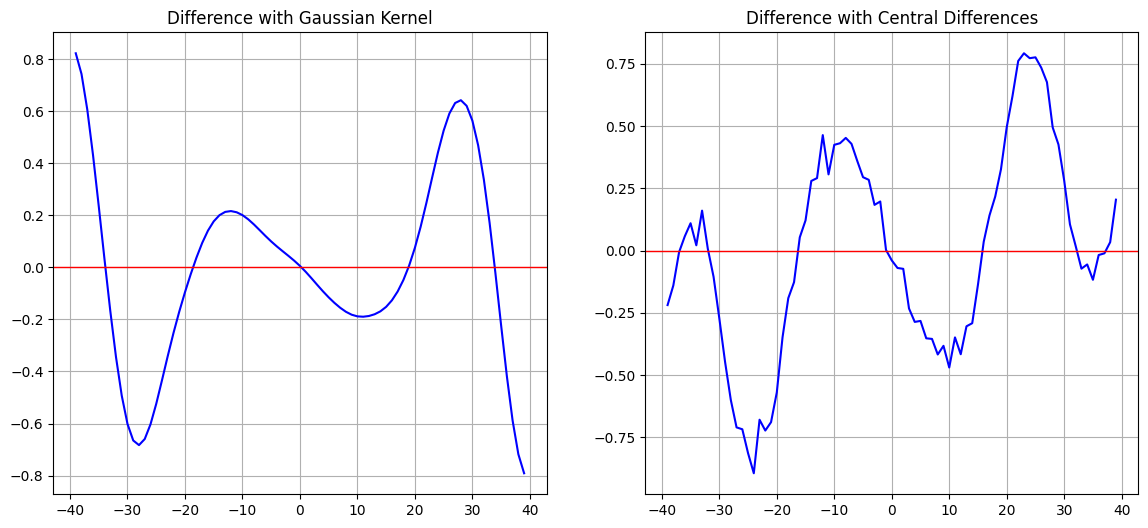

In [34]:

# Plot differences
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_signal('Difference with Gaussian Kernel', t_truncated, s_true_d - noisy_s_prime_gaussian)

plt.subplot(1, 2, 2)
plot_signal('Difference with Central Differences', t_truncated, s_true_d - noisy_s_prime_central)



Gaussian Differentiation Kernel: 

This kernel is generally preferred for noisy signals because it inherently includes a smoothing effect due to the properties of the Gaussian function. This smoothing can help mitigate the impact of noise on the derivative computation, leading to a more accurate estimation of the signal's derivative.

## Part 4: Image Gradient

In [35]:
import urllib.request
import ssl
from os import path as osp
import shutil

def retrieve(file_name, semester='spring24', homework=1):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci527/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))


In [36]:
from skimage.io import imread

retrieve('shadow.png')
shadow = imread('shadow.png').astype(float)

Using previously downloaded file shadow.png


In [37]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def show_image(image, cmap='gray'):
    aspect = image.shape[0] / image.shape[1]
    width = 6
    height = width * aspect
    plt.figure(figsize=(6, height), tight_layout=True)
    plt.imshow(image, cmap=cmap)
    plt.axis('image')
    plt.axis('off')
    plt.colorbar()
    plt.draw()

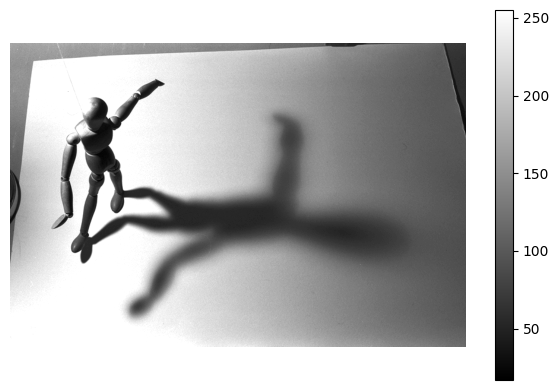

In [38]:
show_image(shadow)

### Problem 4.1

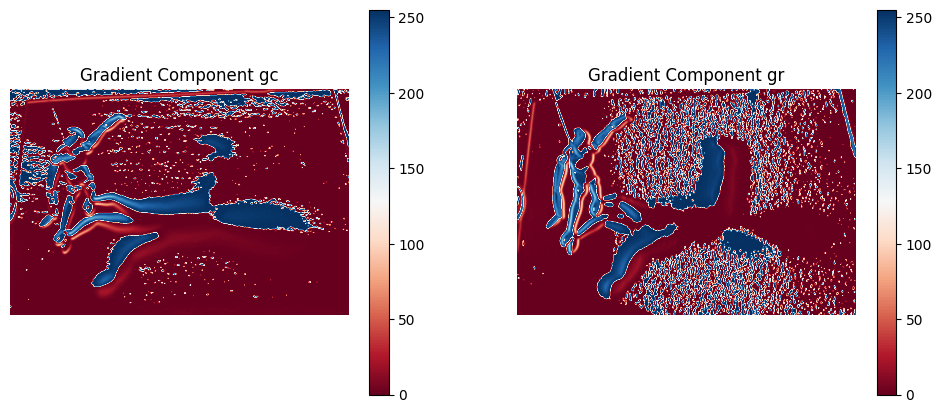

In [39]:
from scipy.ndimage import convolve
from skimage.io import imread

def gradient(image, sigma):
    # Compute Gaussian kernel and its derivative
    g, _ = gaussian(sigma)
    d, _ = d_gaussian(sigma)
    
    # Compute gradients using separability
    gc = convolve(convolve(image, g.reshape((1, -1))), d.reshape((-1, 1)), mode='reflect')
    gr = convolve(convolve(image, g.reshape((-1, 1))), d.reshape((1, -1)), mode='reflect')
    
    return gc, gr

def show_image_with_title(image, title, cmap):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.axis('off')

# Load image
image = imread('shadow.png', as_gray=True)

# Compute gradient
sigma = 2
gc, gr = gradient(image, sigma)

# Display the two arrays side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
show_image_with_title(gc, 'Gradient Component gc', 'RdBu')

plt.subplot(1, 2, 2)
show_image_with_title(gr, 'Gradient Component gr', 'RdBu')
plt.show()


### Problem 4.2

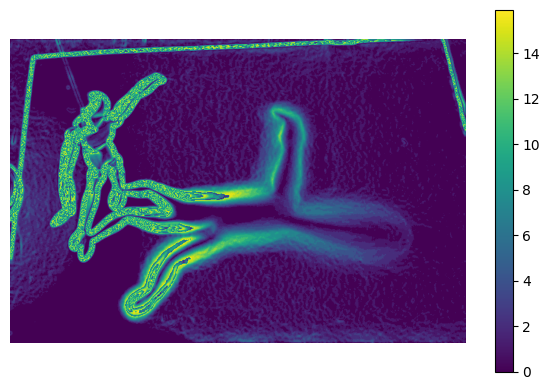

In [40]:


# Compute the magnitude of the gradient
magnitude = np.sqrt(gc**2 + gr**2)

# Display the magnitude
show_image(magnitude, 'viridis')
plt.show()


The gradients are stronger along the mannequin shadow because the transition from light to shadow creates a high contrast boundary. The gradient magnitude is higher where the image intensity changes abruptly, which is typical for edges or transitions from light to dark areas, such as the edges of a shadow in a well-lit scene.

### Problem 4.3

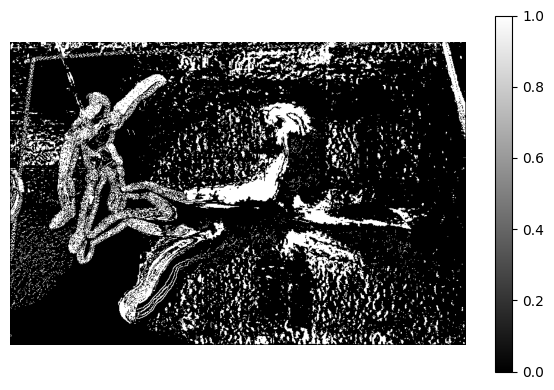

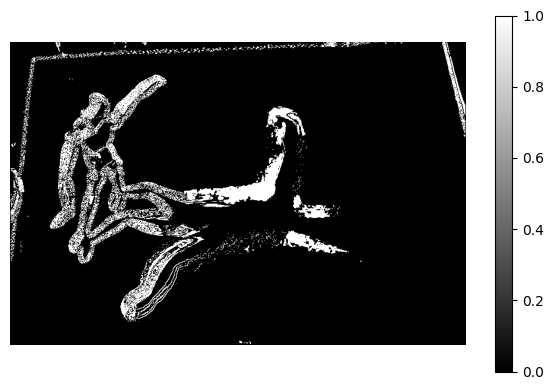

In [41]:
from scipy.interpolate import interpn


def ridges(gc, gr, thr):
    # Step 1: Compute gradient magnitude
    m = np.sqrt(gc**2 + gr**2)
    
    # Step 2: Find valid indices, excluding image boundaries
    valid_mask = np.pad((m[1:-1, 1:-1] >= thr) & (m[1:-1, 1:-1] > 0), pad_width=1, mode='constant', constant_values=False)
    indices = np.flatnonzero(valid_mask)
    rows, cols = np.unravel_index(indices, m.shape)
    
    # Step 3: Compute unit vectors
    gc_flat, gr_flat = gc.ravel()[indices], gr.ravel()[indices]
    norm = np.sqrt(gc_flat**2 + gr_flat**2)
    n_x, n_y = gc_flat / norm, gr_flat / norm
    
    # Coordinates for interpolation
    points = (np.arange(m.shape[0]), np.arange(m.shape[1]))
    
    # Step 4: Compute points a and b
    a_coords = np.column_stack((rows + n_y, cols + n_x))
    b_coords = np.column_stack((rows - n_y, cols - n_x))
    
    # Step 5: Interpolate m at a and b
    m_a = interpn(points, m, a_coords, method='linear', bounds_error=False, fill_value=None)
    m_b = interpn(points, m, b_coords, method='linear', bounds_error=False, fill_value=None)
    
    # Identify local maxima
    m_points = m.ravel()[indices]
    ridge_points = np.zeros_like(m, dtype=bool)
    ridge_points.flat[indices] = (m_points > m_a) & (m_points > m_b)
    
    return ridge_points



# Display ridge points with thresholds 0 and 5
for thr in [0, 5]:
    ridge_map = ridges(gc, gr, thr)
    show_image(ridge_map)


Difficulty in Finding Contours of the Shadow: 

The contours of the shadow are difficult to identify precisely due to the varying gradient magnitudes across the shadow's boundary, influenced by the lighting conditions and the texture of the surface. The gradient might not be consistent along the shadow's edges, especially if the lighting is uneven or if the background texture introduces additional gradients.

Strategy for Improved Contour Detection: 

To better detect the contours of the shadow, one might consider using adaptive thresholding techniques that account for local variations in gradient magnitudes. Additionally, combining gradient information with other image features, such as texture or color information, could help distinguish the shadow more clearly from its surroundings.

## Part 5: Image Resizing and Pyramids

### Problem 5.1

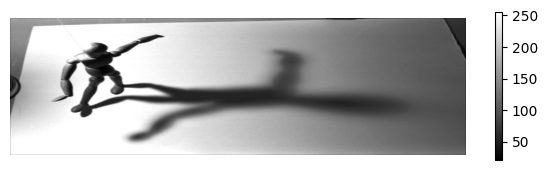

In [42]:
def resize(image, spec):
    original_shape = np.array(image.shape)
    # Determine if spec is a magnification factor or target dimensions
    if isinstance(spec, (int, float)):  # Magnification factor
        target_shape = np.round(original_shape * spec).astype(int)
    elif isinstance(spec, tuple) and len(spec) == 2:  # Target dimensions
        target_shape = np.array(spec)
    else:
        raise ValueError("spec must be either a magnification factor or a tuple of target dimensions.")
    

    # Prepare for interpolation
    points = [np.linspace(0, 1, dim) for dim in original_shape]
    xi = [np.linspace(0, 1, dim) for dim in target_shape]
    coords = np.meshgrid(*xi, indexing='ij')
    coords = np.stack(coords, axis=-1)

    # Compute magnification factors
    phi = target_shape / original_shape
    # Apply Gaussian smoothing before downsampling if shrinking
    if np.any(phi < 1):
        sigma = max(1/phi.min() - 1, 0.5) # Adjust sigma based on magnification factor
        gauss_kernel, _ = gaussian(sigma)
        image_smoothed = np.apply_along_axis(lambda x: np.convolve(x, gauss_kernel, mode='same'), axis=0, arr=image)
        image_smoothed = np.apply_along_axis(lambda x: np.convolve(x, gauss_kernel, mode='same'), axis=1, arr=image_smoothed)
        # Perform interpolation
        resized_image = interpn(points, image_smoothed, coords, method='linear', bounds_error=False, fill_value=0)
        
    else:
        resized_image = interpn(points, image, coords, method='linear', bounds_error=False, fill_value=0)

    return resized_image

# Load image and resize
image = imread('shadow.png', as_gray=True)
resized_image = resize(image, (300, 1000))
show_image(resized_image)

### Problem 5.2

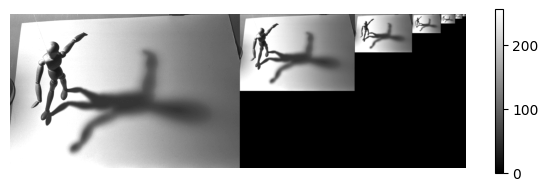

In [43]:
def gaussian_pyramid(image, phi=1/2):
    pyramid = [image]
    i=0
    while min(pyramid[-1].shape) > 8:
        next_level = resize(pyramid[-1], phi)
        pyramid.append(next_level)
    return pyramid

def display_pyramid(pyramid):
    height = max(img.shape[0] for img in pyramid)
    total_width = sum(img.shape[1] for img in pyramid)
    composite_image = np.zeros((height, total_width))
    current_x = 0
    for img in pyramid:
        composite_image[:img.shape[0], current_x:current_x+img.shape[1]] = img
        current_x += img.shape[1]
    show_image(composite_image)

pyramid = gaussian_pyramid(image)
display_pyramid(pyramid)
